In [ ]:
# Install Kaggle
!pip install kaggle

# Upload kaggle.json (downloaded from your Kaggle account) containing your Kaggle API credentials
from google.colab import files
files.upload()

# Move kaggle.json to ~/.kaggle and set permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


ERROR: Operation cancelled by user


Saving kaggle.json to kaggle.json


# **Download the data set**

In [ ]:
# Download LUFlow dataset
!kaggle datasets download -d mryanm/luflow-network-intrusion-detection-data-set

# Unzip the downloaded file
!unzip luflow-network-intrusion-detection-data-set.zip


Dataset URL: https://www.kaggle.com/datasets/mryanm/luflow-network-intrusion-detection-data-set
License(s): CC-BY-SA-4.0
100% 4.59G/4.59G [01:25<00:00, 70.1MB/s]
100% 4.59G/4.59G [01:25<00:00, 57.4MB/s]
Archive:  luflow-network-intrusion-detection-data-set.zip
  inflating: 2020/06/2020.06.19/2020.06.19.csv  
  inflating: 2020/06/2020.06.20/2020.06.20.csv  
  inflating: 2020/06/2020.06.21/2020.06.21.csv  
  inflating: 2020/06/2020.06.22/2020.06.22.csv  
  inflating: 2020/06/2020.06.23/2020.06.23.csv  
  inflating: 2020/06/2020.06.24/2020.06.24.csv  
  inflating: 2020/06/2020.06.25/2020.06.25.csv  
  inflating: 2020/06/2020.06.26/2020.06.26.csv  
  inflating: 2020/06/2020.06.27/2020.06.27.csv  
  inflating: 2020/06/2020.06.28/2020.06.28.csv  
  inflating: 2020/06/2020.06.29/2020.06.29.csv  
  inflating: 2020/06/2020.06.30/2020.06.30.csv  
  inflating: 2020/07/2020.07.01/2020.07.01.csv  
  inflating: 2020/07/2020.07.02/2020.07.02.csv  
  inflating: 2020/07/2020.07.03/2020.07.03.csv  
  in

In [ ]:
import os
import pandas as pd

# set the base directory
base_dir = '/content/2021'

# Initialize an empty list to store data frames
data_frames = []

# Traverse each month and read all CSV files
for year in os.listdir(base_dir):
    year_path = os.path.join(base_dir, year)
    if os.path.isdir(year_path):
        for month in os.listdir(year_path):
            month_path = os.path.join(year_path, month)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(month_path, file)
                        df = pd.read_csv(file_path)
                        data_frames.append(df)

# Concatenate all data frames into one
luflow_data = pd.concat(data_frames, ignore_index=True)




In [ ]:
import os
import pandas as pd

# Define the base directory for the dataset
base_dir = '/content/2020'

# Initialize an empty list to store processed chunks
data_frames = []

# Traverse each month and read all CSV files in chunks
for year in os.listdir(base_dir):
    year_path = os.path.join(base_dir, year)
    if os.path.isdir(year_path):
        for month in os.listdir(year_path):
            month_path = os.path.join(year_path, month)
            if os.path.isdir(month_path):
                for file in os.listdir(month_path):
                    if file.endswith('.csv'):
                        file_path = os.path.join(month_path, file)

                        # Read the file in chunks
                        for chunk in pd.read_csv(file_path, chunksize=10000):  # Adjust chunksize as needed
                            # Process chunk if necessary (e.g., filter or select columns)
                            data_frames.append(chunk)
                            # Clear data in RAM periodically
                            if len(data_frames) >= 10:  # Adjust this to control memory usage
                                luflow_data = pd.concat(data_frames, ignore_index=True)
                                data_frames = []  # Clear list to free up memory

# Concatenate any remaining data frames
if data_frames:
    luflow_data = pd.concat(data_frames, ignore_index=True)




In [ ]:
luflow_data

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,0.000000,0,13032,786,9200.0,2.060537,9,0,6,786,47622.0,1603651788894452,1603651788894359,26852.914000,benign,0.000093
1,0.000000,0,1448,786,9200.0,4.937801,1,0,6,786,47604.0,1603651788894516,1603651788894516,7149.935500,benign,0.000000
2,0.000000,0,11584,786,9200.0,2.241657,8,1,6,786,47604.0,1603651788894935,1603651788894545,25967.352000,benign,0.000390
3,0.000000,0,0,786,47622.0,0.000000,1,0,6,786,9200.0,1603651788894853,1603651788894853,0.000000,benign,0.000000
4,0.000000,0,0,786,47622.0,0.000000,1,0,6,786,9200.0,1603651788895041,1603651788895041,0.000000,benign,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73927,194.083333,1359,761,786,22.0,6.934159,12,14,6,14061,59306.0,1603670366888233,1603670364388557,14700.417000,malicious,2.499676
73928,227.083333,1359,745,786,22.0,6.938264,12,14,6,45090,45694.0,1603670369993704,1603670367049935,14598.108000,malicious,2.943769
73929,0.000000,56,56,786,NaN,1.020244,1,1,1,16509,NaN,1603670381510233,1603670381510086,114.267365,malicious,0.000147
73930,0.000000,56,56,786,NaN,1.020244,1,1,1,16509,NaN,1603670383993482,1603670383993417,114.267365,malicious,0.000065


In [ ]:
luflow_data.to_csv('luflow_data.csv', index=False)

In [ ]:
luflow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73932 entries, 0 to 73931
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_ipt        73932 non-null  float64
 1   bytes_in       73932 non-null  int64  
 2   bytes_out      73932 non-null  int64  
 3   dest_ip        73932 non-null  int64  
 4   dest_port      71221 non-null  float64
 5   entropy        73932 non-null  float64
 6   num_pkts_out   73932 non-null  int64  
 7   num_pkts_in    73932 non-null  int64  
 8   proto          73932 non-null  int64  
 9   src_ip         73932 non-null  int64  
 10  src_port       71221 non-null  float64
 11  time_end       73932 non-null  int64  
 12  time_start     73932 non-null  int64  
 13  total_entropy  73932 non-null  float64
 14  label          73932 non-null  object 
 15  duration       73932 non-null  float64
dtypes: float64(6), int64(9), object(1)
memory usage: 9.0+ MB


In [ ]:
luflow_data.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,7.393200e+04,73932.000000,73932.000000,73932.000000,71221.000000,73932.000000,73932.000000,73932.000000,73932.000000,73932.000000,71221.000000,7.393200e+04,7.393200e+04,73932.000000,73932.000000
mean,4.359145e+06,643.873789,2508.446086,6770.201144,10177.532848,3.373674,8.275591,5.191879,6.253950,32430.152194,41412.110333,1.460920e+15,1.458448e+15,9005.423213,1.573193
std,7.429815e+07,2507.368484,7838.789954,34938.433855,15946.148963,2.264000,25.919937,13.135919,2.379552,72572.571380,19574.152480,4.334702e+14,4.366657e+14,20715.848695,5.360344
min,0.000000e+00,0.000000,0.000000,174.000000,7.000000,0.000000,0.000000,0.000000,1.000000,4.000000,7.000000,1.603655e+11,1.603652e+11,0.000000,0.000000
25%,0.000000e+00,0.000000,12.000000,786.000000,445.000000,1.020244,1.000000,0.000000,6.000000,786.000000,33266.000000,1.603652e+15,1.603652e+15,69.284210,0.000000
50%,0.000000e+00,7.000000,191.000000,786.000000,5060.000000,4.570133,3.000000,2.000000,6.000000,4134.000000,47628.000000,1.603653e+15,1.603653e+15,2112.018600,0.010406
75%,9.600000e+01,270.000000,1012.250000,786.000000,9200.000000,4.946743,6.000000,6.000000,6.000000,18809.000000,54823.000000,1.603662e+15,1.603662e+15,8222.146750,0.688032
max,4.294967e+09,29064.000000,65511.000000,398705.000000,65533.000000,13.636020,255.000000,231.000000,17.000000,398722.000000,65534.000000,1.603670e+15,1.603670e+15,538285.800000,36.096360


In [ ]:
# Check for missing values
print("Missing values per column:\n", luflow_data.isnull().sum())

# Drop or fill missing values if necessary
luflow_data = luflow_data.dropna()  # or use luflow_data.fillna(value)



Missing values per column:
 avg_ipt             0
bytes_in            0
bytes_out           0
dest_ip             0
dest_port        2711
entropy             0
num_pkts_out        0
num_pkts_in         0
proto               0
src_ip              0
src_port         2711
time_end            0
time_start          0
total_entropy       0
label               0
duration            0
dtype: int64


In [ ]:
# Check the class distribution
if 'label' in luflow_data.columns:
    print("Class distribution:\n", luflow_data['label'].value_counts())


Class distribution:
 label
malicious    40410
benign       28148
outlier       2663
Name: count, dtype: int64


In [ ]:
# Drop rows where label column contains the value 'outlier'
luflow_data = luflow_data[luflow_data['label'] != 'outlier']


In [ ]:
# fill missing values with a median
luflow_data['dest_port'].fillna(luflow_data['dest_port'].median(), inplace=True)
luflow_data['src_port'].fillna(luflow_data['src_port'].median(), inplace=True)


<ipython-input-10-ec0a86ce7862>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  luflow_data['dest_port'].fillna(luflow_data['dest_port'].median(), inplace=True)
<ipython-input-10-ec0a86ce7862>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

In [ ]:

# Check the class distribution if there is a target column for labels
if 'label' in luflow_data.columns:
    print("Class distribution:\n", luflow_data['label'].value_counts())


Class distribution:
 label
malicious    40410
benign       28148
Name: count, dtype: int64


Class distribution:
 label
malicious    40410
benign       28148
Name: count, dtype: int64


<ipython-input-12-45c1a52f35aa>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=luflow_data, x='label', palette='viridis')


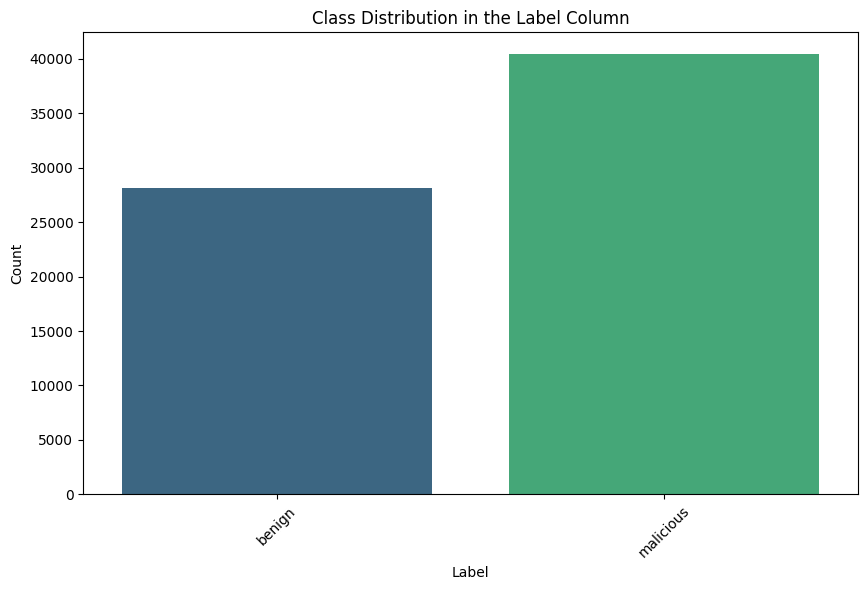

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the 'label' column exists
if 'label' in luflow_data.columns:
    # Print class distribution
    print("Class distribution:\n", luflow_data['label'].value_counts())

    # Plot the count plot for class distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=luflow_data, x='label', palette='viridis')
    plt.title("Class Distribution in the Label Column")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The 'label' column is not found in the dataset.")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding categorical columns
label_encoders = {}
for column in luflow_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    luflow_data[column] = le.fit_transform(luflow_data[column])
    label_encoders[column] = le


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Encode categorical variables
if 'proto' in luflow_data.columns:
    luflow_data['proto'] = LabelEncoder().fit_transform(luflow_data['proto'])

# Encode target variable if needed
if 'label' in luflow_data.columns:
    luflow_data['label'] = LabelEncoder().fit_transform(luflow_data['label'])

# Select features and target
X = luflow_data.drop(columns=['label', 'src_ip', 'dest_ip', 'src_port', 'dest_port'])  # Dropping IP and port columns
y = luflow_data['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),

    "Support Vector Machine": SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print the classification report and accuracy
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Accuracy: 0.8870
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      5630
           1       0.86      0.96      0.91      8082

    accuracy                           0.89     13712
   macro avg       0.90      0.87      0.88     13712
weighted avg       0.89      0.89      0.89     13712


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9114
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      5630
           1       0.99      0.86      0.92      8082

    accuracy                           0.91     13712
   macro avg       0.91      0.92      0.91     13712
weighted avg       0.92      0.91      0.91     13712



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [ ]:

# Convert labels to categorical format for multi-class classification
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Build the neural network model
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Predictions and evaluation metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))

Epoch 1/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9063 - loss: 0.2487 - val_accuracy: 0.9730 - val_loss: 0.0874
Epoch 2/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9718 - loss: 0.0896 - val_accuracy: 0.9734 - val_loss: 0.0741
Epoch 3/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9717 - loss: 0.0834 - val_accuracy: 0.9802 - val_loss: 0.0695
Epoch 4/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9772 - loss: 0.0742 - val_accuracy: 0.9823 - val_loss: 0.0608
Epoch 5/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9804 - loss: 0.0663 - val_accuracy: 0.9819 - val_loss: 0.0585
Epoch 6/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9813 - loss: 0.0609 - val_accuracy: 0.9832 - val_loss: 0.0563
Epoch 7/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9815 - loss: 0.0614 - val_accuracy: 0.9825 - val_loss: 0.0587
Epoch 8/20
619/619 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9815 - loss: 0.0602 - val_accuracy: 0.


Training DenseNet...
Epoch 1/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8394 - loss: 0.3441 - val_accuracy: 0.8925 - val_loss: 0.1688
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9071 - loss: 0.1791 - val_accuracy: 0.9245 - val_loss: 0.1446
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9183 - loss: 0.1576 - val_accuracy: 0.9267 - val_loss: 0.1360
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9248 - loss: 0.1442 - val_accuracy: 0.9280 - val_loss: 0.1357
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9257 - loss: 0.1411 - val_accuracy: 0.9272 - val_loss: 0.1331
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9252 - loss: 0.1370 - val_accuracy: 0.9303 - val_loss: 0.1294
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9288 - loss: 0.1332 - val_accuracy: 0.9284 - val_loss: 0.1340
Epoch 8/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9265 - loss: 0.

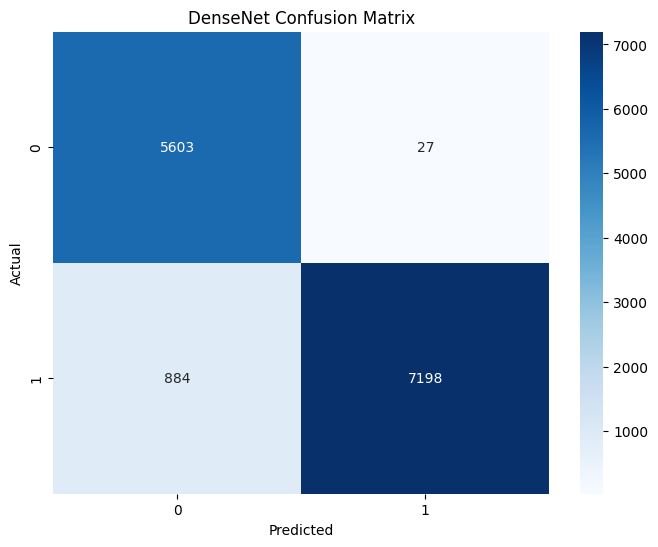


Training CNN...
Epoch 1/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8323 - loss: 0.3808 - val_accuracy: 0.8979 - val_loss: 0.1730
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9004 - loss: 0.1996 - val_accuracy: 0.9235 - val_loss: 0.1547
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9084 - loss: 0.1766 - val_accuracy: 0.9229 - val_loss: 0.1466
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9137 - loss: 0.1656 - val_accuracy: 0.9249 - val_loss: 0.1454
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9156 - loss: 0.1588 - val_accuracy: 0.9232 - val_loss: 0.1516
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9162 - loss: 0.1554 - val_accuracy: 0.9086 - val_loss: 0.1390
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9161 - loss: 0.1544 - val_accuracy: 0.9240 - val_loss: 0.1379
Epoch 8/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9190 - loss: 0.1511 

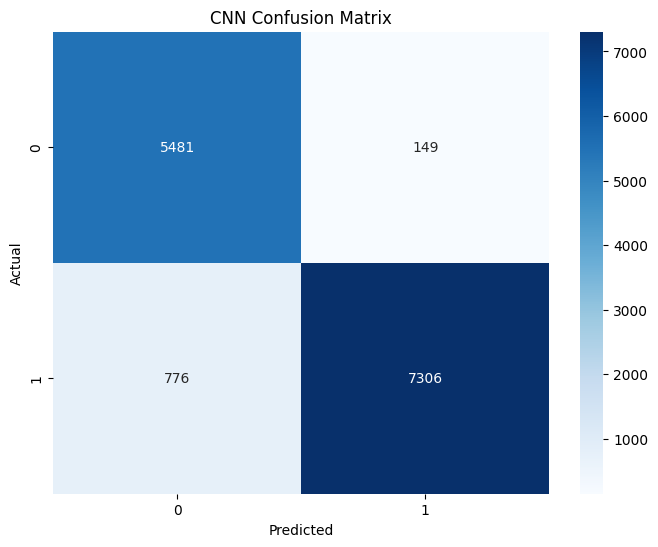


Training LSTM...
Epoch 1/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7721 - loss: 0.4400 - val_accuracy: 0.8980 - val_loss: 0.1720
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9027 - loss: 0.1803 - val_accuracy: 0.9157 - val_loss: 0.1544
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9115 - loss: 0.1646 - val_accuracy: 0.9216 - val_loss: 0.1509
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9158 - loss: 0.1539 - val_accuracy: 0.9257 - val_loss: 0.1439
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9162 - loss: 0.1531 - val_accuracy: 0.9040 - val_loss: 0.1498
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9169 - loss: 0.1473 - val_accuracy: 0.9256 - val_loss: 0.1405
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9211 - loss: 0.1431 - val_accuracy: 0.9044 - val_loss: 0.1449
Epoch 8/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9213 - loss: 0.142

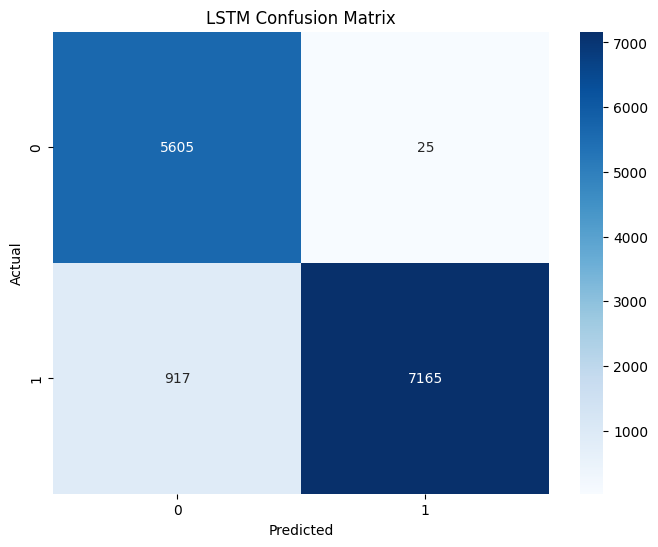


Training GRU...
Epoch 1/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8394 - loss: 0.3888 - val_accuracy: 0.8931 - val_loss: 0.1657
Epoch 2/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9076 - loss: 0.1764 - val_accuracy: 0.9228 - val_loss: 0.1495
Epoch 3/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9093 - loss: 0.1627 - val_accuracy: 0.9174 - val_loss: 0.1447
Epoch 4/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9140 - loss: 0.1555 - val_accuracy: 0.9239 - val_loss: 0.1411
Epoch 5/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9188 - loss: 0.1457 - val_accuracy: 0.9255 - val_loss: 0.1404
Epoch 6/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9210 - loss: 0.1438 - val_accuracy: 0.9262 - val_loss: 0.1363
Epoch 7/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9185 - loss: 0.1404 - val_accuracy: 0.9272 - val_loss: 0.1329
Epoch 8/20
686/686 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9222 - loss: 0.1394 

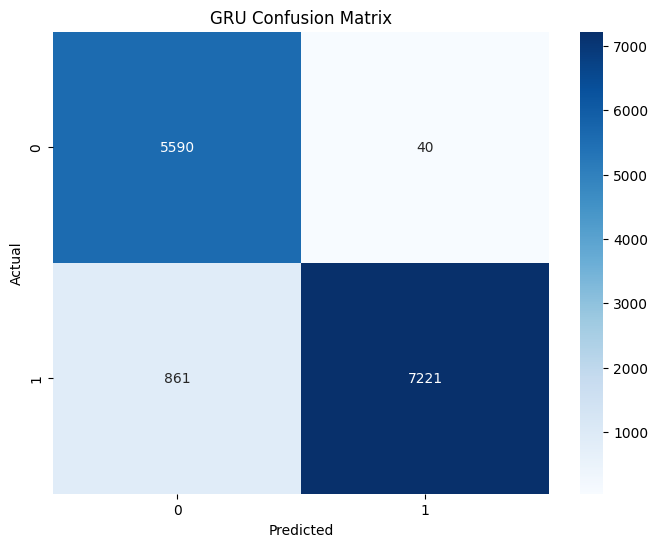

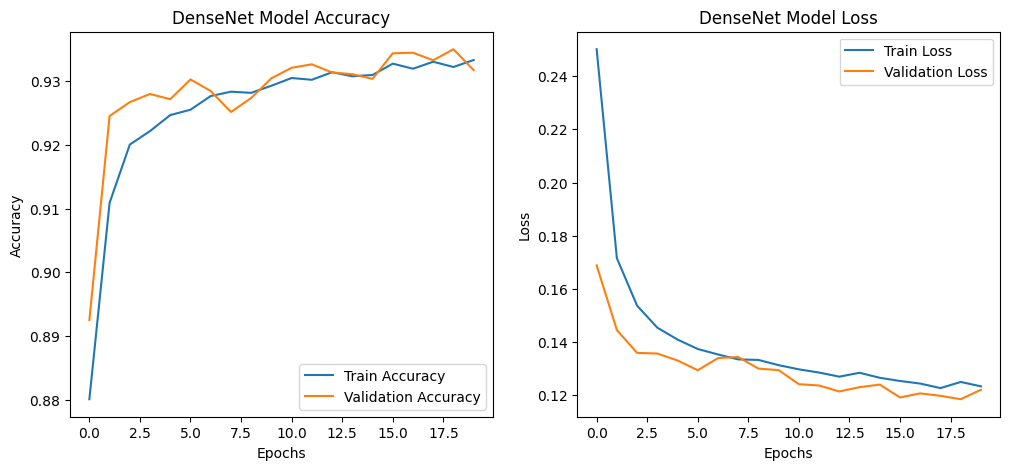

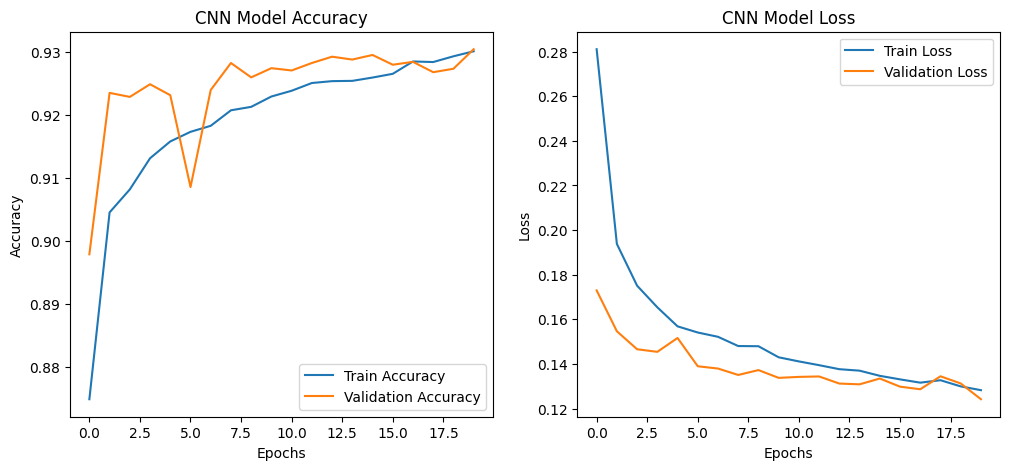

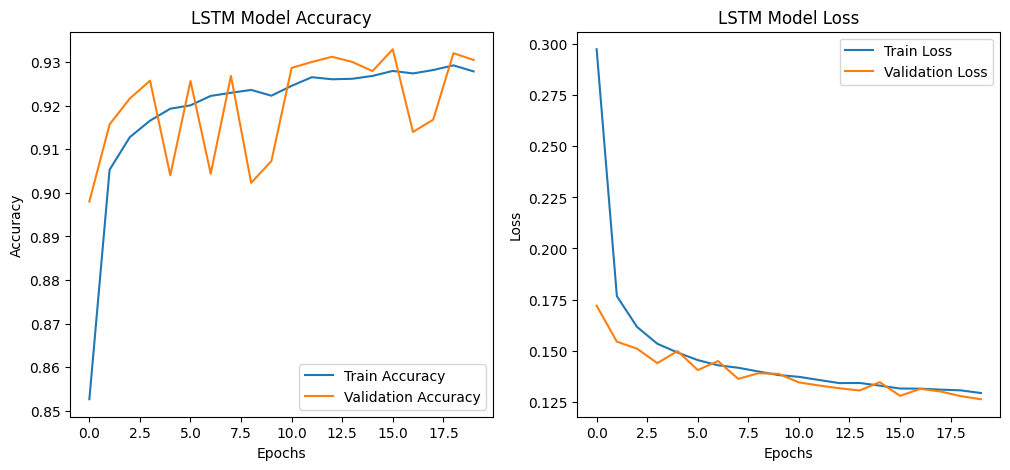

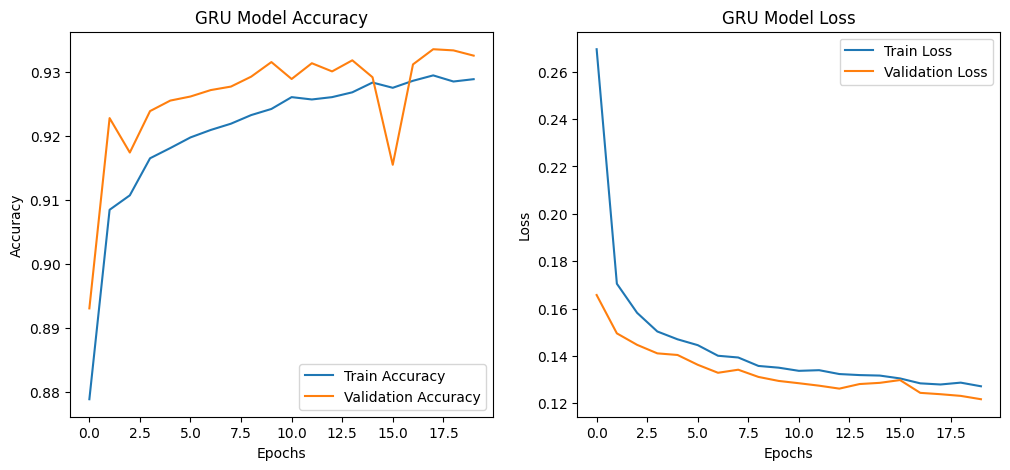


Training Time for Each Model:
DenseNet: 50.78 seconds
CNN: 53.10 seconds
LSTM: 51.48 seconds
GRU: 55.75 seconds


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, GRU
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Encode categorical features and target variable
if 'proto' in luflow_data.columns:
    luflow_data['proto'] = LabelEncoder().fit_transform(luflow_data['proto'])

if 'label' in luflow_data.columns:
    luflow_data['label'] = LabelEncoder().fit_transform(luflow_data['label'])

# Select features and target
X = luflow_data.drop(columns=['label', 'src_ip', 'dest_ip', 'src_port', 'dest_port'])
y = luflow_data['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical format
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

### Define Deep Learning Models ###
# Model 1: Fully Connected Neural Network
def create_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, input_shape=(input_shape,), activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 2: CNN Neural Network
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 3: LSTM Neural Network
def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, input_shape=(1, input_shape), activation='relu', return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Model 4: GRU Neural Network
def create_gru_model(input_shape, num_classes):
    model = Sequential([
        GRU(64, input_shape=(1, input_shape), activation='relu', return_sequences=True),
        Dropout(0.3),
        GRU(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Prepare input shape for CNN, LSTM, and GRU
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)
X_train_seq = np.expand_dims(X_train, axis=1)
X_test_seq = np.expand_dims(X_test, axis=1)

# Train and evaluate each model
models = {
    "DenseNet": create_dense_model(X_train.shape[1], num_classes),
    "CNN": create_cnn_model(X_train.shape[1], num_classes),
    "LSTM": create_lstm_model(X_train.shape[1], num_classes),
    "GRU": create_gru_model(X_train.shape[1], num_classes)
}

history_dict = {}
time_dict = {}

for model_name, model in models.items():
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print(f"\nTraining {model_name}...")

    start_time = time.time()  # Start timing

    if model_name == "DenseNet":
        history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
    elif model_name == "CNN":
        history = model.fit(X_train_cnn, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
    elif model_name in ["LSTM", "GRU"]:
        history = model.fit(X_train_seq, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

    end_time = time.time()  # End timing

    # Store history and time complexity for plotting
    history_dict[model_name] = history.history
    time_dict[model_name] = end_time - start_time

    # Evaluate the model
    if model_name == "DenseNet":
        y_pred = model.predict(X_test)
    elif model_name == "CNN":
        y_pred = model.predict(X_test_cnn)
    else:
        y_pred = model.predict(X_test_seq)

    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    print(f"{model_name} Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Plot Confusion Matrix
    print(f"\n{model_name} Confusion Matrix:")
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot Training History
for model_name, history in history_dict.items():
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history['accuracy'], label='Train Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Print time complexity for each model
print("\nTraining Time for Each Model:")
for model_name, time_taken in time_dict.items():
    print(f"{model_name}: {time_taken:.2f} seconds")



Training Logistic Regression...
Logistic Regression Accuracy: 0.9364
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4614
           1       0.93      0.98      0.95      7765

    accuracy                           0.94     12379
   macro avg       0.94      0.92      0.93     12379
weighted avg       0.94      0.94      0.94     12379



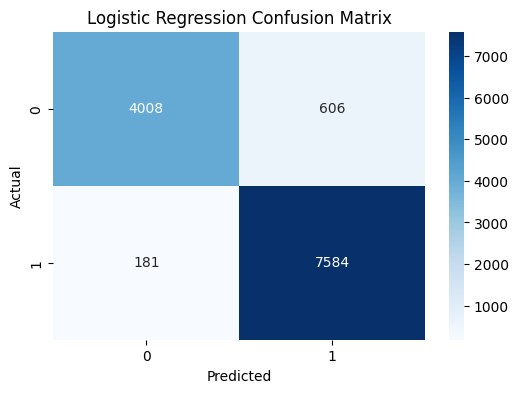


Training Support Vector Machine...
Support Vector Machine Accuracy: 0.9530
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      4614
           1       0.96      0.97      0.96      7765

    accuracy                           0.95     12379
   macro avg       0.95      0.95      0.95     12379
weighted avg       0.95      0.95      0.95     12379



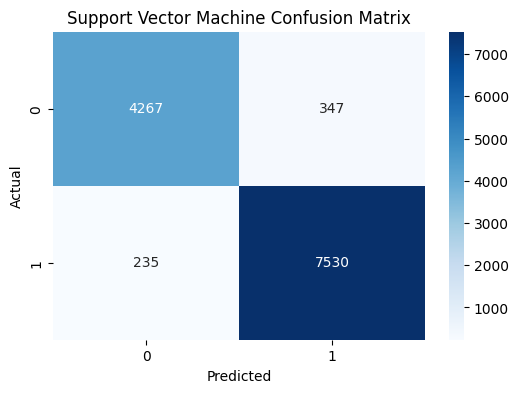


Training Random Forest...
Random Forest Accuracy: 0.9982
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4614
           1       1.00      1.00      1.00      7765

    accuracy                           1.00     12379
   macro avg       1.00      1.00      1.00     12379
weighted avg       1.00      1.00      1.00     12379



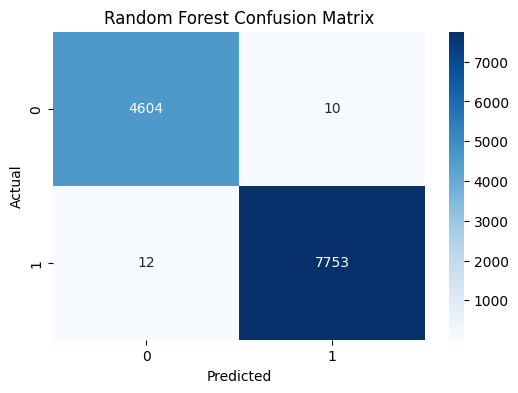


Training Decision Tree...
Decision Tree Accuracy: 0.9966
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4614
           1       1.00      1.00      1.00      7765

    accuracy                           1.00     12379
   macro avg       1.00      1.00      1.00     12379
weighted avg       1.00      1.00      1.00     12379



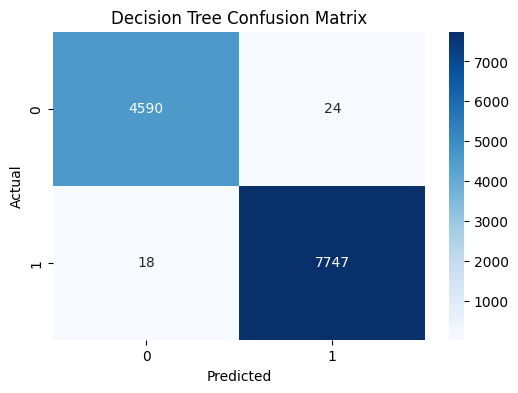


Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 0.9955
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4614
           1       1.00      1.00      1.00      7765

    accuracy                           1.00     12379
   macro avg       0.99      1.00      1.00     12379
weighted avg       1.00      1.00      1.00     12379



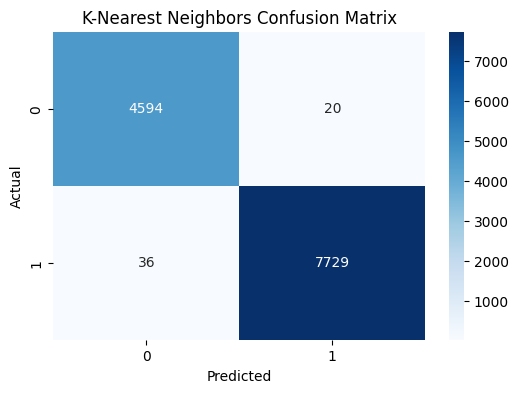


Training Time for Each Model:
Logistic Regression: 0.6226 seconds
Support Vector Machine: 46.7352 seconds
Random Forest: 6.5324 seconds
Decision Tree: 0.3600 seconds
K-Nearest Neighbors: 0.0992 seconds


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Encode categorical variables
if 'proto' in luflow_data.columns:
    luflow_data['proto'] = LabelEncoder().fit_transform(luflow_data['proto'])

# Encode target variable if needed
if 'label' in luflow_data.columns:
    luflow_data['label'] = LabelEncoder().fit_transform(luflow_data['label'])

# Select features and target
X = luflow_data.drop(columns=['label', 'src_ip', 'dest_ip', 'src_port', 'dest_port'])  # Dropping IP and port columns
y = luflow_data['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
time_dict = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Measure training time for time complexity
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Store training time
    time_dict[model_name] = end_time - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Print the classification report and accuracy
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Print training time for each model (Time Complexity)
print("\nTraining Time for Each Model:")
for model_name, time_taken in time_dict.items():
    print(f"{model_name}: {time_taken:.4f} seconds")
